<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%A4%EC%8A%B52_%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80%EB%86%8D%EB%8F%84%ED%98%84%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[ 데이터 전처리 단계 ]**

**1. 데이터 처리와 연산을 위한 패키지 불러오기**

In [ ]:
import numpy as np
import pandas as pd

**2. 개인 PC에서 파일 업로드 - 이부분은 Colab 을 사용하지 않고 주피터 노트북 사용하면 생략**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2018_total.xlsx to 2018_total.xlsx


In [ ]:
!ls     # 데이터가 업로드 되었는지 list를 확인해봄

2018_total.xlsx  sample_data


**3. 판다스 데이터프레임 df1 에 엑셀 파일 읽어서 저장하기**

In [ ]:
df1 = pd.read_excel('2018_total.xlsx')

In [ ]:
df1.head(5)     #저장한 df1 자료의 위에서 5개까지 읽어오기

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,111121,중구,2018010101,0.004,0.5,0.020,0.020,34.0,19.0,서울 중구 덕수궁길 15
1,서울 중구,111121,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0,서울 중구 덕수궁길 15
2,서울 중구,111121,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0,서울 중구 덕수궁길 15
3,서울 중구,111121,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0,서울 중구 덕수궁길 15
4,서울 중구,111121,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0,서울 중구 덕수궁길 15


**4. 데이터 형태 확인하기**

In [ ]:
df1.shape

(343104, 11)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343104 entries, 0 to 343103
Data columns (total 11 columns):
지역       343104 non-null object
측정소코드    343104 non-null int64
측정소명     343104 non-null object
측정일시     343104 non-null int64
SO2      330883 non-null float64
CO       331084 non-null float64
O3       331687 non-null float64
NO2      332877 non-null float64
PM10     325985 non-null float64
PM25     298218 non-null float64
주소       343104 non-null object
dtypes: float64(6), int64(2), object(3)
memory usage: 28.8+ MB


**5. 결측치 처리하기**

In [ ]:
df1.isnull().head()    #null 값이 있는지 확니

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df1.isnull().sum()   # null 갯수 합계

지역           0
측정소코드        0
측정소명         0
측정일시         0
SO2      12221
CO       12020
O3       11417
NO2      10227
PM10     17119
PM25     44886
주소           0
dtype: int64

In [ ]:
PM10 = df1['PM10']
PM10_mean = PM10.mean()
PM10_mean

42.12807951286102

In [ ]:
PM10.fillna(PM10_mean, inplace=True)

In [ ]:
df1.isnull().sum()

지역           0
측정소코드        0
측정소명         0
측정일시         0
SO2      12221
CO       12020
O3       11417
NO2      10227
PM10         0
PM25     44886
주소           0
dtype: int64

### **[ 분석 단계 ]**

**1. 지역별, 측정 일자별 최대값을 구하기 위해 측정일자 항목의 데이터 타입 변환**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343104 entries, 0 to 343103
Data columns (total 11 columns):
지역       343104 non-null object
측정소코드    343104 non-null int64
측정소명     343104 non-null object
측정일시     343104 non-null int64
SO2      330883 non-null float64
CO       331084 non-null float64
O3       331687 non-null float64
NO2      332877 non-null float64
PM10     343104 non-null float64
PM25     298218 non-null float64
주소       343104 non-null object
dtypes: float64(6), int64(2), object(3)
memory usage: 28.8+ MB


In [ ]:
df1['측정일시'] = df1['측정일시'].astype(str) #str로 변형
df1['측정일시'] = df1['측정일시'].str[0:8]    #년[:4], 월[4:6], 일[6:8]만으로 자르기

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343104 entries, 0 to 343103
Data columns (total 11 columns):
지역       343104 non-null object
측정소코드    343104 non-null int64
측정소명     343104 non-null object
측정일시     343104 non-null object
SO2      330883 non-null float64
CO       331084 non-null float64
O3       331687 non-null float64
NO2      332877 non-null float64
PM10     343104 non-null float64
PM25     298218 non-null float64
주소       343104 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 28.8+ MB


**2. 지역별, 일자별 최대값을 구한 후 PM10 값이 70 이상인 데이터 추출하기**

In [ ]:
# '측정일시'를 중요 기준으로 '지역'별로 'PM10'의 최대값 구하기

df2 = df1.groupby(['측정일시','지역'])['PM10'].max()
df2.head()                              #df2: Series

측정일시      지역     
20180101  서울 강남구     72.00000
          서울 강동구     71.00000
          서울 강북구     57.00000
          서울 강서구     71.00000
          서울 강서로     42.12808
Name: PM10, dtype: float64

In [ ]:
# 각 일자에서 PM10 값이 70 이상인 것 파악하기

df3 = df2>70
df3.head()

측정일시      지역     
20180101  서울 강남구      True
          서울 강동구      True
          서울 강북구     False
          서울 강서구      True
          서울 강서로     False
Name: PM10, dtype: bool

**3. 추출한 데이터에서 지역별로 합계 구하기**

In [ ]:
# 지역별로 70 이상인 경우 합계 구하기

result = df3.sum(level='지역')

### **[ 정보 표현 - 가시화 ]**

**1. 필요한 패키지 가져오기**

In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_

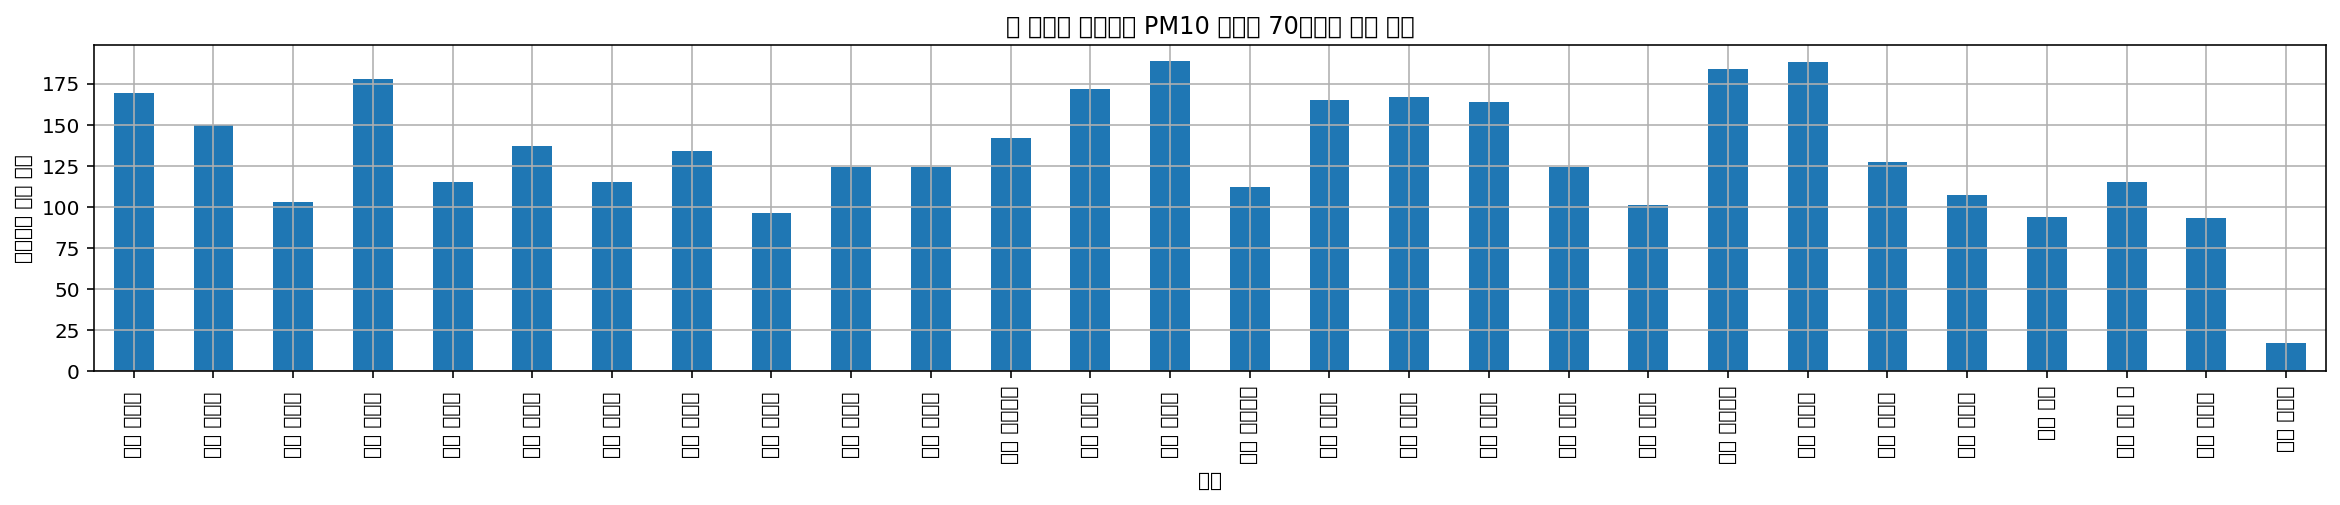

In [ ]:
# 결과 시각화
result.plot(kind='bar', figsize=(20, 3))
plt.title('각 지역별 미세먼지 PM10 지수가 70이상인 나쁨 일수')
plt.xlabel("지역")
plt.ylabel("미세먼지 나쁨 일수")
plt.grid(True)     # 그리드 나타내기
plt.show()

## **[팁!]**
Google Drive에서 파일 가져와서 Dataframe에 저장하기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
!ls "/gdrive/My Drive"

 2018_total_google.xlsx   deeplearning	        Untitled0.ipynb
'Colab Notebooks'	  IMDB-Movie-Data.csv


In [ ]:
df_google = pd.read_excel("/gdrive/My Drive/2018_total_google.xlsx")

In [ ]:
df_google.head(5)

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,111121,중구,2018010101,0.004,0.5,0.020,0.020,34.0,19.0,서울 중구 덕수궁길 15
1,서울 중구,111121,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0,서울 중구 덕수궁길 15
2,서울 중구,111121,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0,서울 중구 덕수궁길 15
3,서울 중구,111121,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0,서울 중구 덕수궁길 15
4,서울 중구,111121,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0,서울 중구 덕수궁길 15


## **[팁!]**
데이터 가져오기 전에 여러개여서 합쳐야 할 경우 : colab에서 실행하지 말고 주피터나 VS Code 사용

In [ ]:
# 엑셀 파일 합치기
import pandas as pd  
import numpy as np  
import glob  
import sys

#파일 Union  
all_data = pd.DataFrame()  
for f in glob.glob('C:/Users/coojugi/Documents/대한상공회의소/2018/2018년*.xlsx'):  
    df = pd.read_excel(f)  
    all_data = all_data.append(df, ignore_index=True)

#데이터갯수확인  
print(all_data.shape)

#데이터 잘 들어오는지 확인  
all_data.head()

#파일저장  
all_data.to_excel("C:/Users/coojugi/Documents/대한상공회의소/2018/2018_total.xlsx", header=True, index=False)

df1 = pd.read_excel('2018/2018_total.xlsx')
df2 = df1[df1['지역'].str[0:2] == '서울']  
df2.head(5)